In [1]:
import numpy as np
import torch
from train_rootspike_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"
Z_file = "spk_loc.npy"

E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)
Z = np.load(base_dir+cell_type+"_"+experiment+"/data/"+Z_file).flatten()

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)
Z = torch.from_numpy(Z)

In [3]:
model_type = "alpha_rootspike"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")


if model_type == "alpha_rootspike":
    batch_size = 50000
    iter_no = 10000
    epoch_no = 15
    lr = 0.005
elif model_type == "alpha_rootspike_2nonlin":
    batch_size = 50000
    iter_no = 10000
    epoch_no = 15
    lr = 0.005


In [4]:
train_glm(model_type, V, Z, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                device, lr, save_dir)

397



0.9152082204818726
0.15257464
tensor([ 1836,  2631,  6984,  7701,  8171,  8881,  9666, 10096, 12551, 15791,
        16540, 17029, 18246, 18313, 18831, 18836, 18862, 19351, 19491, 20126,
        20197, 20377, 20873, 21284, 21733, 21804, 22009, 22952, 23290, 24235,
        24403, 24934, 25047, 25201, 25531, 25586, 25621, 26091, 26551, 26638,
        26996, 27031, 27311, 27392, 28901, 30101, 30131, 30151, 30726, 31396,
        32056, 32611, 33256, 33851, 36382, 42016, 43871, 45041, 45716, 46411,
        48266, 48351], device='cuda:0')
tensor([ 5801,  6981,  8881,  8886, 11416, 12646, 16986, 18226, 19491, 19495,
        21386, 22601, 25041, 25046, 25701], device='cuda:0')
8 7


In [18]:
model_type = "alpha_rootspike"

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub11_output.npz")

In [6]:
test = output["test"]
#C_syn_e = output["C_syn_e"]
#C_syn_i = output["C_syn_i"]
filters = output["filters"]

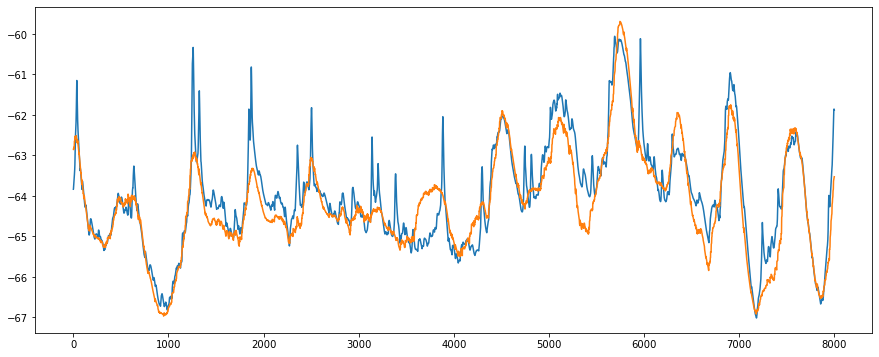

In [7]:
plt.figure(figsize = (15,6))
plt.plot(V[T_train:T_train+T_test][17000:25000][:])
plt.plot(test[17000:25000][:])

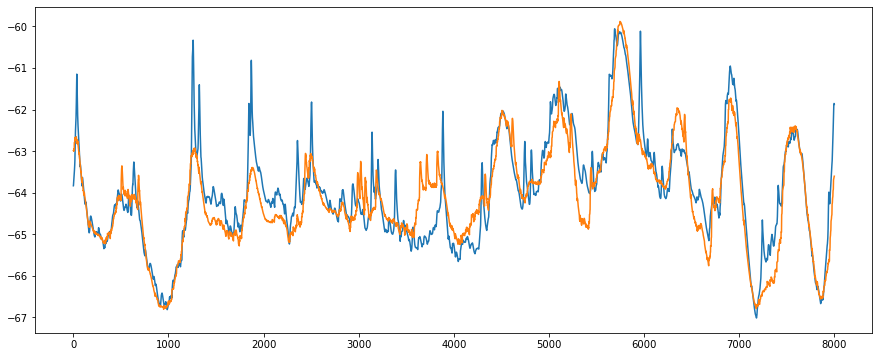

In [7]:
plt.figure(figsize = (15,6))
plt.plot(V[T_train:T_train+T_test][17000:25000][:])
plt.plot(test[17000:25000][:])

(46, 500)


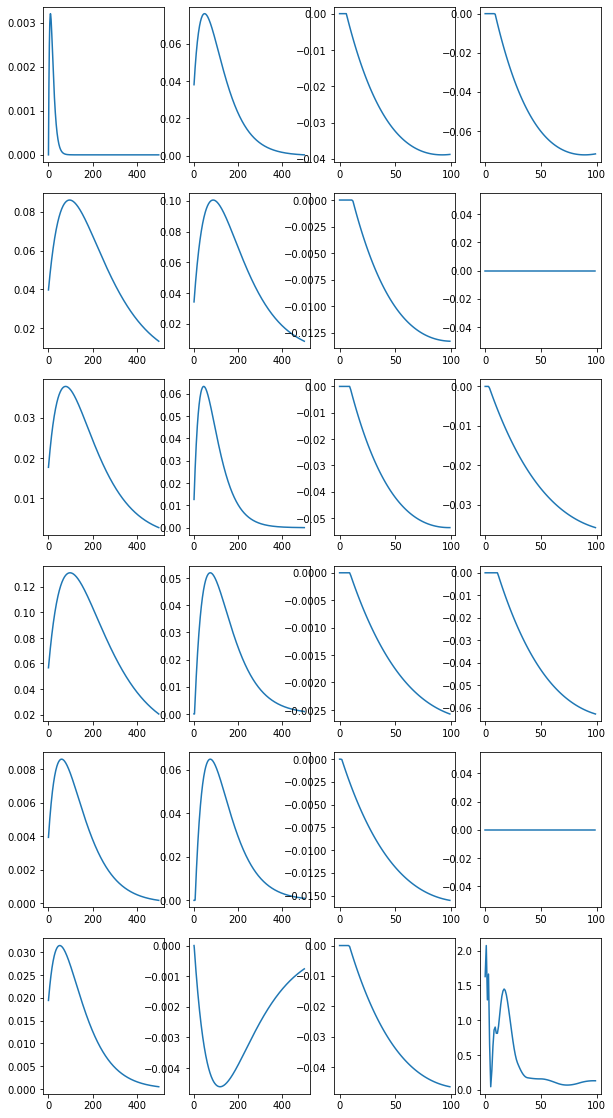

In [8]:
sub_no = 6
print(filters.shape)

fig, axs = plt.subplots(nrows=sub_no, ncols=4, figsize = (10,20))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    axs[i,2].plot(filters[2*sub_no+i][:100])
    axs[i,3].plot(filters[3*sub_no+i][:100])
    #axs[i,2].plot(filters[sub_no*2+i])

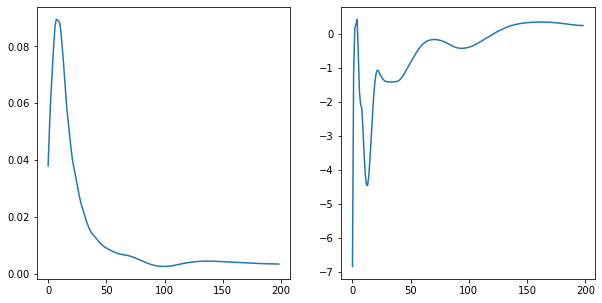

In [9]:
fig, axs = plt.subplots(ncols=2, figsize = (10,5))
axs[0].plot(filters[-2][:199])
axs[1].plot(filters[-1][:199])